# <center> IPL Dataset Analysis(2008-2020)

The Indian Premier League (IPL) stands as a professional Twenty20 cricket league held annually in India from March to May. Eight teams, representing different cities or states in India, compete in the league, which was established by the Board of Control for Cricket in India (BCCI) in 2007. Renowned as the most-attended cricket league globally, the IPL's brand value reached ₹475 billion (US$6.7 billion) in 2019.

## Topics covered in this notebook :

1.What was the count of matches played in each season?

2.How many runs were scored in each season?

3.What were the runs scored per match in different seasons?

4.Who has umpired the most?

5.Which team has won the most tosses?

6.What does the team decide after winning the toss?

7.How does the toss decision vary across seasons?

8.Does winning the toss imply winning the game?

9.How many times has the chasing team won the match?

10.Which all teams have won this tournament?

11.Which team has played the most number of matches?

12.Which team has won the most number of times?

13.Which team has the highest winning percentage?

14.Is there any lucky venue for a particular team?

15.Comparison between two teams

16.Particular Batsmen analysis

17.Innings-wise comparison between teams

18.Which team has scored the most number of 200+ scores?

19.Which team has conceded 200+ scores the most?

20.What was the highest run scored by a team in a single match?

21.Which is the biggest win in terms of run margin?

22.Which batsmen have played the most number of balls?

23.Who are the leading run-scorers of all time?

24.Who has hit the most number of 4's?

25.Who has hit the most number of 6's?

26.Who has the highest strike rate?

27.Who is the leading wicket-taker?

28.Which stadium has hosted the most number of matches?

29.Who has won the most Man of the Match (MOM) awards?

30.What is the count of fours hit in each season?

31.What is the count of sixes hit in each season?

32.What is the count of runs scored from boundaries in each season?

33.What is the run contribution from boundaries in each season?

34.Which team has scored the most runs in the first 6 overs?

35.Which team has scored the most runs in the last 4 overs?

36.Which team has the best scoring run-rate in the first 6 overs?

37.Which team has the best scoring run-rate in the last 4 overs?


# Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Loading match and deliveries dataset:

In [2]:
deliveries_df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
matches_df = pd.read_csv('IPL Matches 2008-2020.csv')
print("Data ready for exploration")

Data ready for exploration


# Basic Data Exploration:

In [3]:
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
matches_df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
matches_df.shape

(816, 17)

In [7]:
matches_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
print('Total Matches Played:',matches_df.shape[0])
print('\n Venues Played At:',matches_df['city'].unique())
print('\n Teams :',matches_df['team1'].unique())

Total Matches Played: 816

 Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


# 1) Number of matches played in various seasons :

In [9]:
matches_df['Season'] = pd.DatetimeIndex(matches_df['date']).year
matches_df.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008


In [10]:
matches_per_season = matches_df.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
matches_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


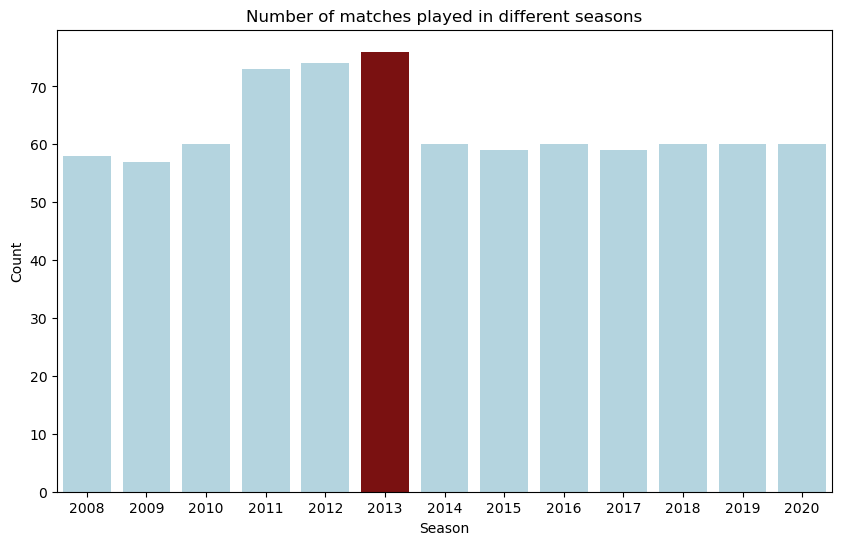

In [11]:
colors = ['lightblue'] * 13
colors[5] = 'darkred'

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='matches', data=matches_per_season, palette=colors)

plt.title('Number of matches played in different seasons')
plt.xlabel('Season')
plt.ylabel('Count')

plt.show()

Here we can see, each season, almost 60 matches were played. However, we see a spike in the number of matches from 2011 to 2013. This is because two new franchises, the Pune Warriors and Kochi Tuskers Kerala, were introduced, increasing the number of teams to 10.

# 2) Total number of runs scored across seasons :

In [12]:
season_data = matches_df[['id','Season']].merge(deliveries_df, left_on='id', right_on='id', how='left').drop('id', axis=1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


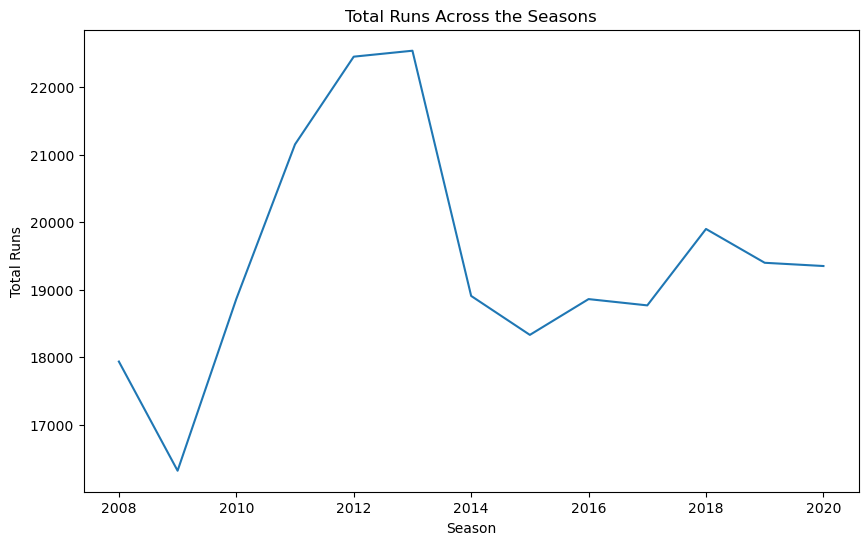

In [13]:
season = season_data.groupby(['Season'])['total_runs'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Season', y='total_runs', data=season)

plt.title('Total Runs Across the Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')

plt.show()

We can see clearly, Season 2013 was the highest scoring season (22,541 runs), followed by 2012 (22,453 runs) Season 2009 was the lowest scoring season (16,320 runs).

# 3) Runs scored per match across seasons :

In [14]:
runs_per_season = pd.concat([matches_per_season, season.iloc[:,1]], axis=1)
runs_per_season['Average Runs per Match'] = runs_per_season['total_runs'] / runs_per_season['matches']
runs_per_season.set_index('Season', inplace=True)
runs_per_season

,matches,total_runs,Average Runs per Match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


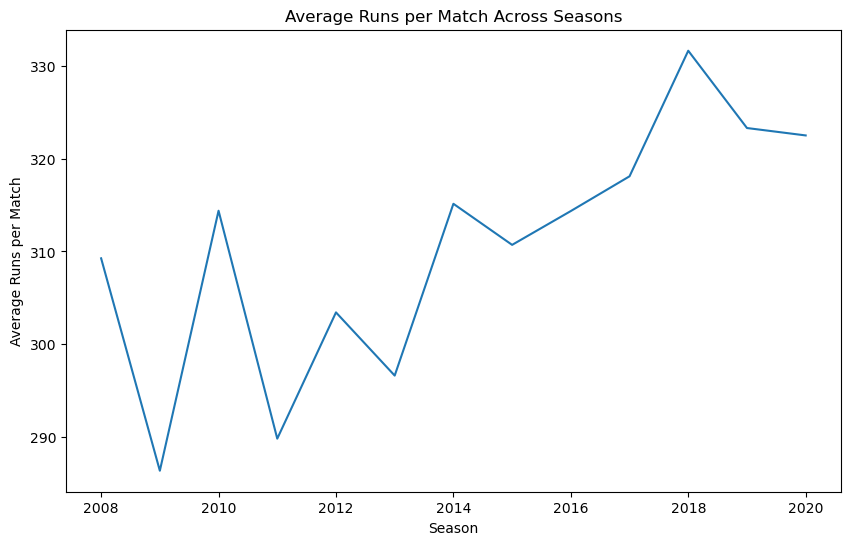

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=runs_per_season.index, y="Average Runs per Match", data=runs_per_season)

plt.title('Average Runs per Match Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Runs per Match')

plt.show()

Here we can observe, in season 2018, runs scored per match was around 330
which was highest among others. In season 2009, runs scored per match was 286.315789 which was lowest till now.

# 4) Count of matches by umpires :

In [16]:
umpires = pd.concat([matches_df['umpire1'], matches_df['umpire2']])
umpires_count = umpires.value_counts()
umpires_df = umpires_count.to_frame().reset_index()
umpires.head(10)

0    Asad Rauf
1    MR Benson
2    Aleem Dar
3     SJ Davis
4    BF Bowden
5    Aleem Dar
6    IL Howell
7    DJ Harper
8    Asad Rauf
9    Aleem Dar
dtype: object

We can clearly conclude, S Ravi has umpired in most number of matches i.e., 121 matches, followed by Dharmasena (94 matches).

# 5) Number of tosses won by teams :

In [17]:
matches_df['toss_winner'].value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

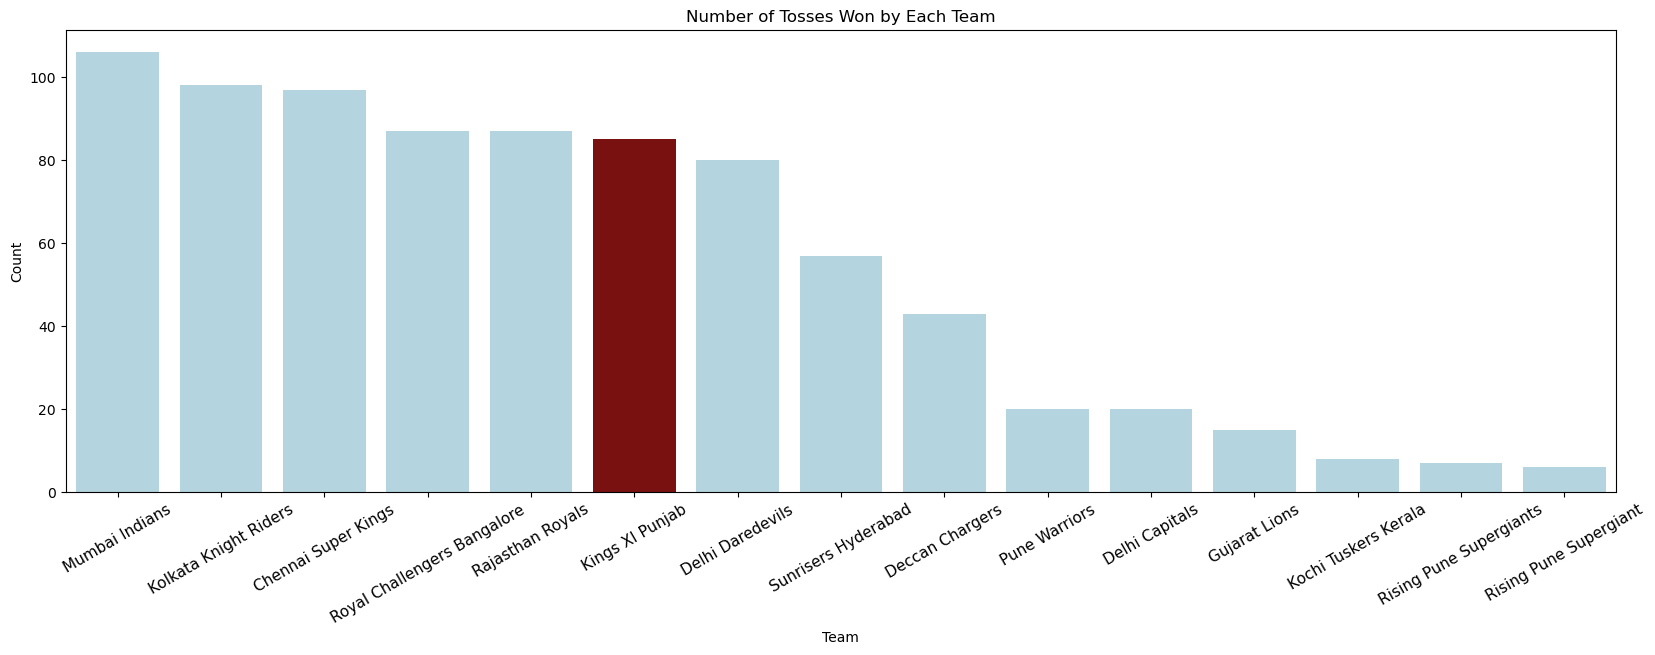

In [18]:
toss = matches_df['toss_winner'].value_counts()
colors = ['lightblue'] * 15
colors[5] = 'darkred'

plt.figure(figsize=(20, 6))
sns.barplot(x=toss.index, y=toss, palette=colors)
plt.xticks(size=11,rotation=30)
plt.title('Number of Tosses Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')

plt.show()

it's clearly visible that Mumbai Indians have won the most tosses, followed by Kolkata Knight Riders.

# 6) Decision made after winning the toss :

Text(0.5, 1.0, 'Toss Decision Percentage')

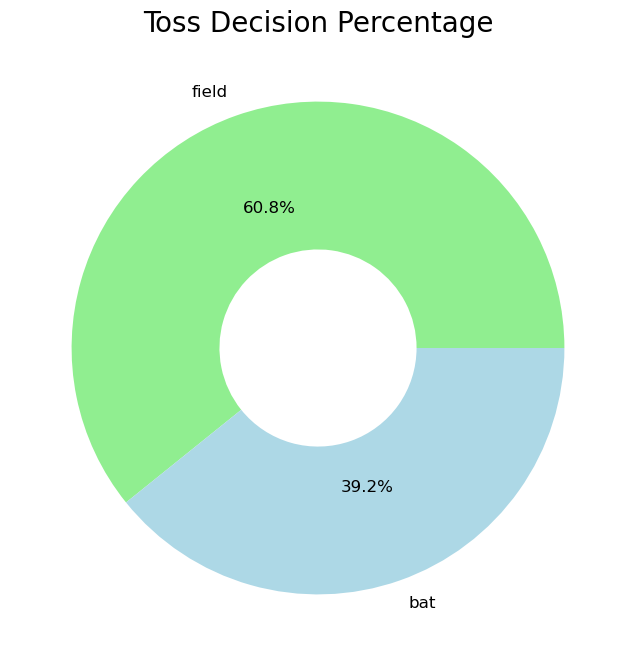

In [19]:
temp_counts = matches_df['toss_decision'].value_counts()
labels = temp_counts.index
values = (temp_counts / temp_counts.sum()) * 100
colors = ['lightgreen', 'lightblue']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.6), textprops={'fontsize': 12})
plt.title('Toss Decision Percentage', fontsize=20)


After winning the toss, team tends to field first

# 7) Toss decision across seasons :

In [20]:
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


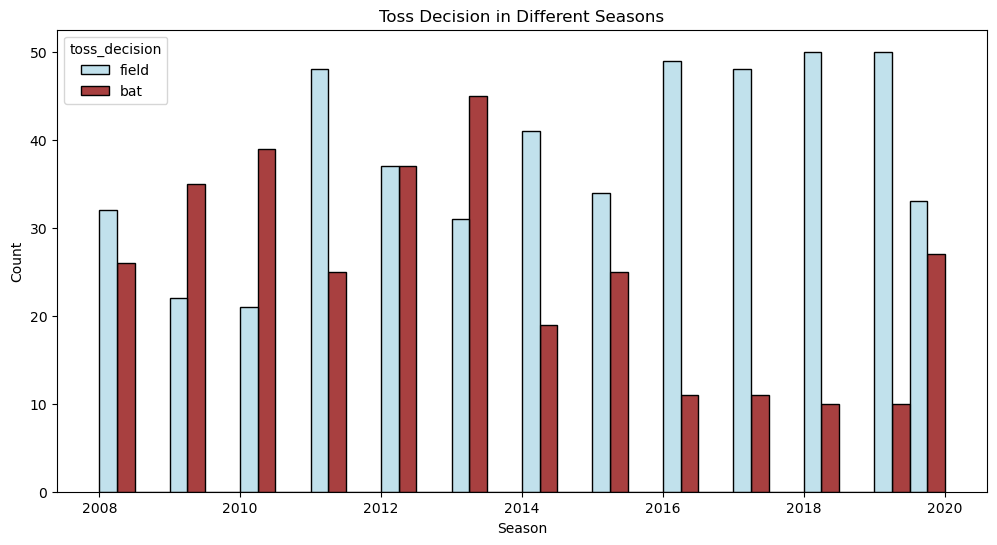

In [21]:

import plotly.express as px

plt.figure(figsize=(12, 6))
sns.histplot(data=matches_df, x='Season', hue='toss_decision', multiple='dodge', palette=["lightblue", "darkred"],binwidth=0.5)

plt.title('Toss Decision in Different Seasons')
plt.xticks(ha='center')
plt.xlabel('Season')
plt.ylabel('Count')

plt.show()

It is understandable that, most of the times, teams decide to feild first except in season 2009,2010,2013 where teams decided to bat first mostly.Since 2014, teams have overwhelmingly chosen to bat second. Especially since 2016, teams have chosen to field for more than 80% of the times except in season 2020.

# 8)Winning toss implies winning game ?

In [22]:
matches_df['toss_win_game_win'] = np.where((matches_df.toss_winner == matches_df.winner), 'Yes', 'No')
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,No
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,Yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,No
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,No
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,No


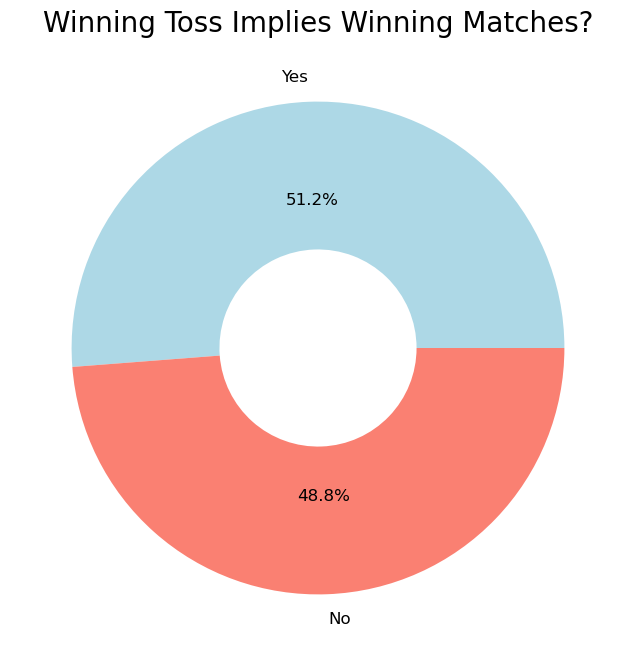

In [23]:
labels = ["Yes", 'No']
values = matches_df['toss_win_game_win'].value_counts()
colors = ['lightblue', 'salmon']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.6), textprops={'fontsize': 12})
plt.title('Winning Toss Implies Winning Matches?', fontsize=20)

plt.show()

We can conclude, though winning toss gives you an advantage but it doesn't significantly implies that winning the toss helps in winning the game.

# 9) Match win result:

In [24]:
result_counts = matches_df['result'].value_counts()
result_counts

wickets    435
runs       364
tie         13
Name: result, dtype: int64

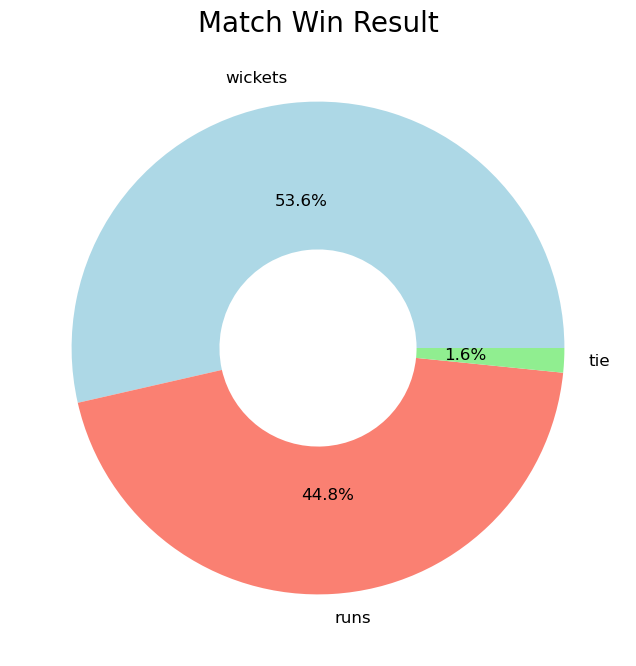

In [25]:
labels = np.array(result_counts.index)
values = np.array((result_counts / result_counts.sum()) * 100)
colors = ['lightblue', 'salmon', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.6), textprops={'fontsize': 12})
plt.title('Match Win Result', fontsize=20)

plt.show()

We can see that 435 out of 816 matches was won by team batting second (Wickets win) while 364 matches was won by team batting first (Runs Win).

# 10) Number of times team have won the tournament :

In [26]:
winning_teams = matches_df[['Season', 'winner']]

#dictionaries to get winners to each season
winners_team = {}
for season in sorted(winning_teams['Season'].unique()):
    winners_team[season] = winning_teams[winning_teams['Season'] == season]['winner'].tail(1).values[0]

winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])
winners_of_IPL.value_counts().index

MultiIndex([(       'Mumbai Indians',),
            (  'Chennai Super Kings',),
            ('Kolkata Knight Riders',),
            (      'Deccan Chargers',),
            (     'Rajasthan Royals',),
            (  'Sunrisers Hyderabad',)],
           names=['team'])

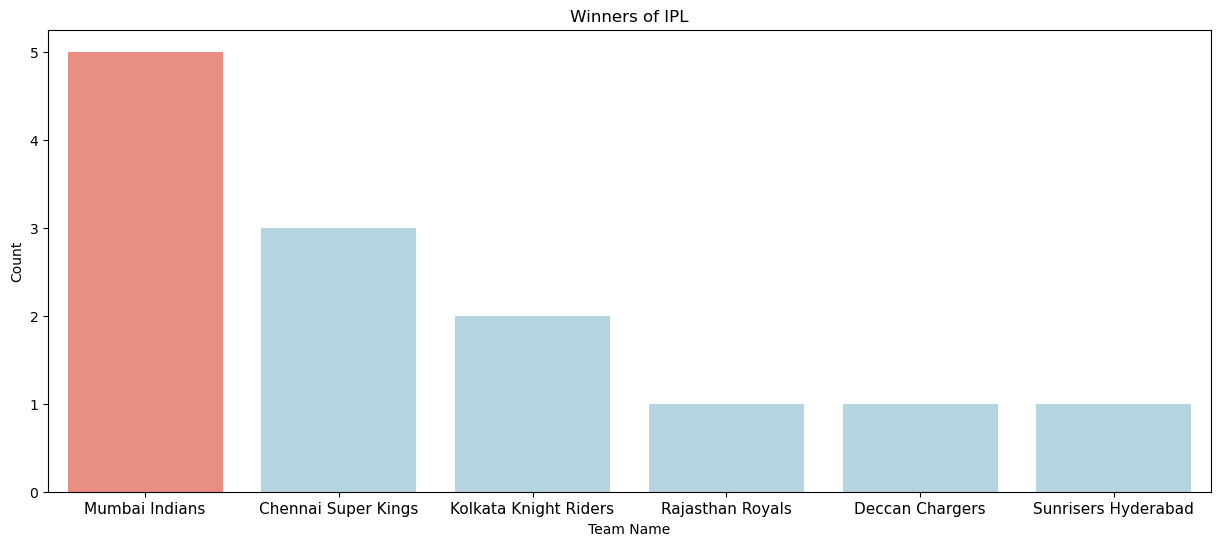

In [27]:
colors = ['lightblue'] * 6
colors[0] = 'salmon'

plt.figure(figsize=(15, 6))
sns.barplot(x=winners_of_IPL['team'].value_counts().index, y=winners_of_IPL['team'].value_counts(),
            palette=colors)

plt.title('Winners of IPL')
plt.xticks(size=11)
plt.xlabel('Team Name')
plt.ylabel('Count')

plt.show()

 It's clearly visible, Mumbai Indians had won the IPL 5 times while Chennai Super Kings had won it 3 times.

# 11) Total number of matches played by a team :

In [28]:
matches_played_by_teams = pd.concat([matches_df['team1'], matches_df['team2']], axis=1)
teams = (matches_played_by_teams['team1'].value_counts() + matches_played_by_teams['team2'].value_counts()).reset_index()
teams.columns = ['Team Name', 'Total Matches played']
teams_sorted = teams.sort_values(by=['Total Matches played'], ascending=False).reset_index().drop('index', axis=1)
teams_sorted

,Team Name,Total Matches played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [29]:
team_wins = pd.DataFrame(matches_df['winner'].value_counts()).reset_index()
team_wins.columns = ['Team Name', 'Wins']
team_wins

,Team Name,Wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


In [30]:
team_stats = teams.merge(team_wins, left_on='Team Name', right_on='Team Name', how='inner')
team_stats['Win Percentage'] = (team_stats['Wins'] / team_stats['Total Matches played']) * 100
team_stats_sorted = team_stats.sort_values(by=['Win Percentage'], ascending=False).reset_index().drop('index', axis=1)
team_stats_sorted

,Team Name,Total Matches played,Wins,Win Percentage
0,Rising Pune Supergiant,16,10,62.500000
1,Chennai Super Kings,178,106,59.550562
2,Mumbai Indians,203,120,59.113300
3,Delhi Capitals,33,19,57.575758
4,Sunrisers Hyderabad,124,66,53.225806
5,Kolkata Knight Riders,192,99,51.562500
6,Rajasthan Royals,161,81,50.310559
7,Royal Challengers Bangalore,195,91,46.666667
8,Kings XI Punjab,190,88,46.315789
9,Gujarat Lions,30,13,43.333333


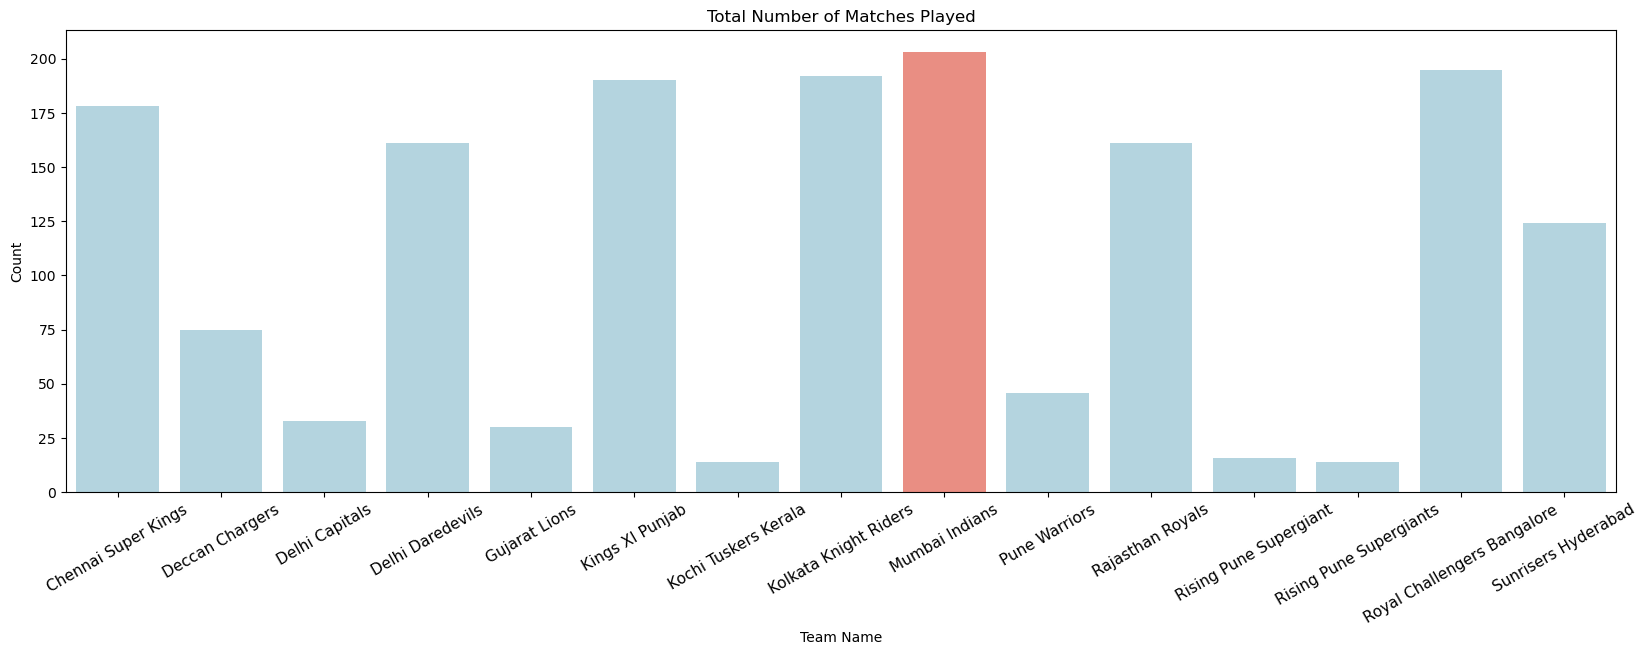

In [31]:
bar_colors = ['lightblue'] * 15
bar_colors[8] = 'salmon'

plt.figure(figsize=(20, 6))
sns.barplot(x=team_stats['Team Name'], y=team_stats['Total Matches played'], palette=bar_colors)

plt.title('Total Number of Matches Played')
plt.xlabel('Team Name')
plt.ylabel('Count')
plt.xticks(size=11,rotation=30)

plt.show()

We can see,  Mumbai Indians have played the most matches(203), followed by Royal Challengers Bangalore (195)

# 12) Most number of wins :

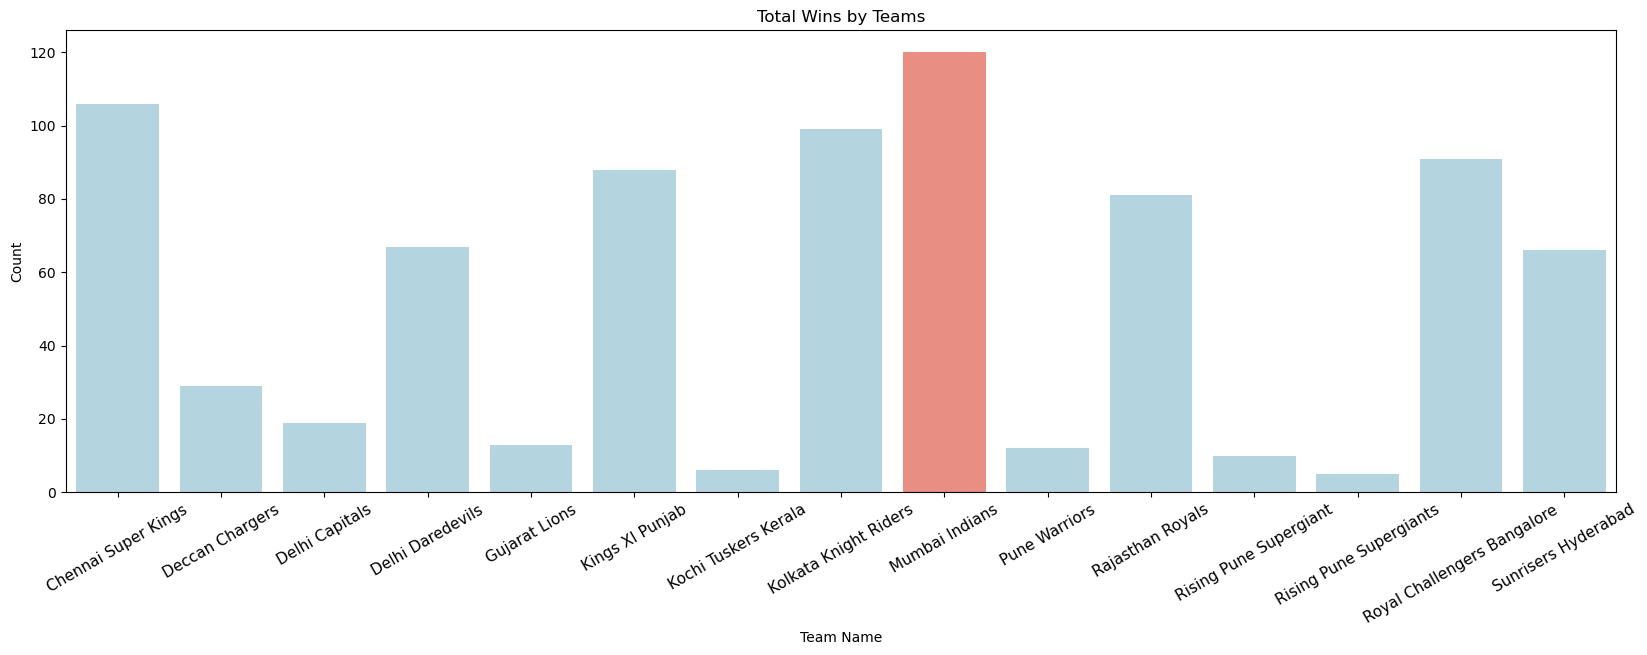

In [32]:
bar_colors = ['lightblue'] * 15
bar_colors[8] = 'salmon'

plt.figure(figsize=(20, 6))
sns.barplot(x=team_stats['Team Name'], y=team_stats['Wins'], palette=bar_colors)

plt.title('Total Wins by Teams')
plt.xlabel('Team Name')
plt.ylabel('Count')
plt.xticks(size=11,rotation=30)

plt.show()


Again we can see, Mumbai Indians had won the most matches(120), followed by Chennai Super Kings (106)

# 13) Win % by teams :

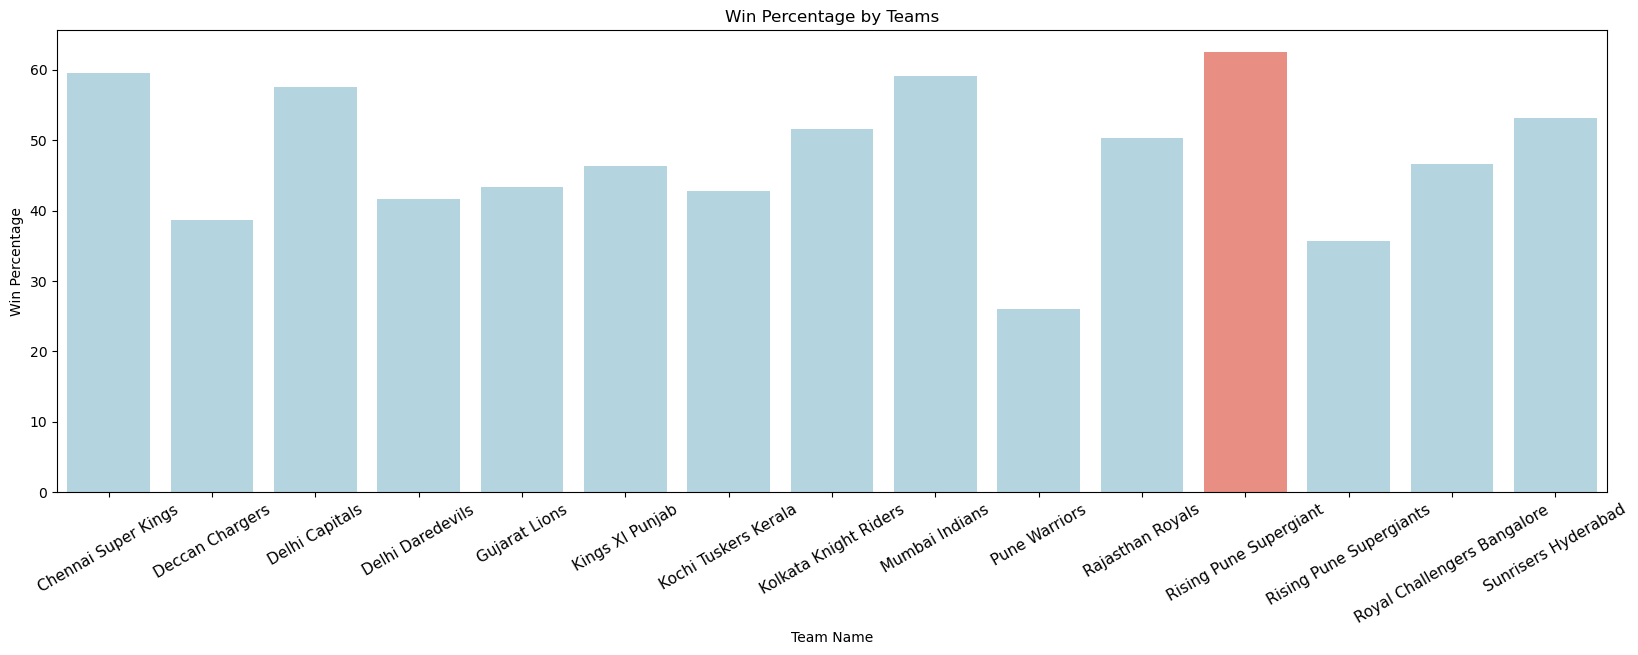

In [33]:
bar_colors = ['lightblue'] * 15
bar_colors[-4] = 'salmon'

plt.figure(figsize=(20, 6))
sns.barplot(x=team_stats['Team Name'], y=team_stats['Win Percentage'], palette=bar_colors)

plt.title('Win Percentage by Teams')
plt.xlabel('Team Name')
plt.ylabel('Win Percentage')
plt.xticks(size=11,rotation=30)

plt.show()

Rising Pune Supergiants have the highest win % of 62.50, followed by Chennai Super kings and Mumbai Indians.
This is largely due to the fact that they had played only two seasons.

# 14) Lucky Venues for a team :

In [34]:
def lucky(matches_df, team_name):
    return matches_df[matches_df['winner'] == team_name]['venue'].value_counts().nlargest(10)

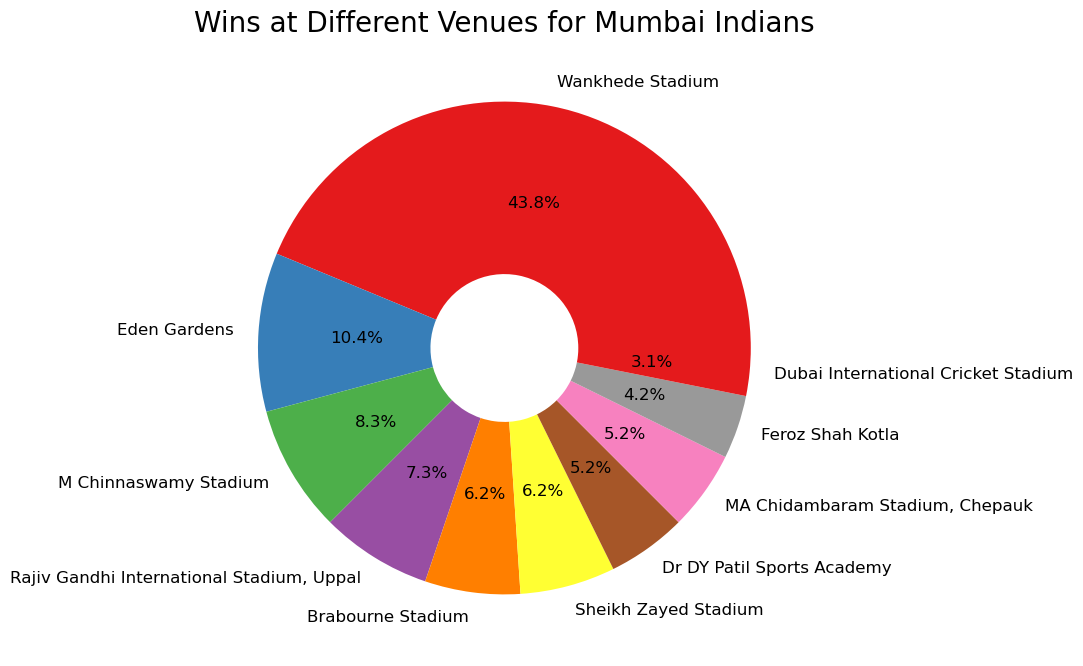

In [35]:
mi_wins = lucky(matches_df, 'Mumbai Indians')
values = mi_wins.values
labels = mi_wins.index
colors = sns.color_palette("Set1")
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%',colors=colors, wedgeprops=dict(width=0.7), textprops={'fontsize': 12})
plt.title('Wins at Different Venues for Mumbai Indians', fontsize=20)

plt.show()

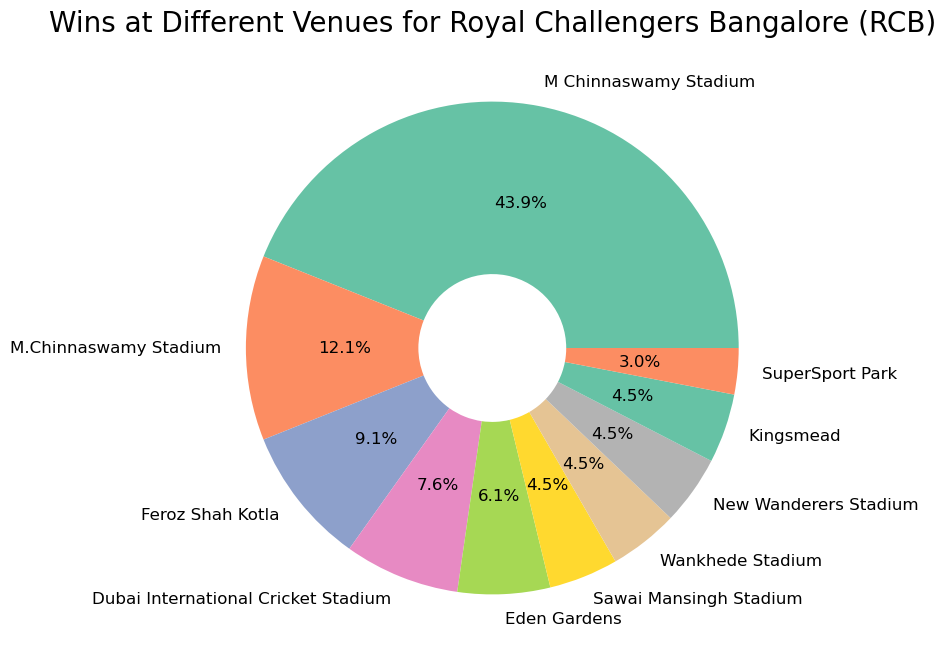

In [36]:
rcb_wins = lucky(matches_df, 'Royal Challengers Bangalore')
values = rcb_wins.values
labels = rcb_wins.index
colors = sns.color_palette("Set2")

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.7), textprops={'fontsize': 12})
plt.title('Wins at Different Venues for Royal Challengers Bangalore (RCB)', fontsize=20)

plt.show()

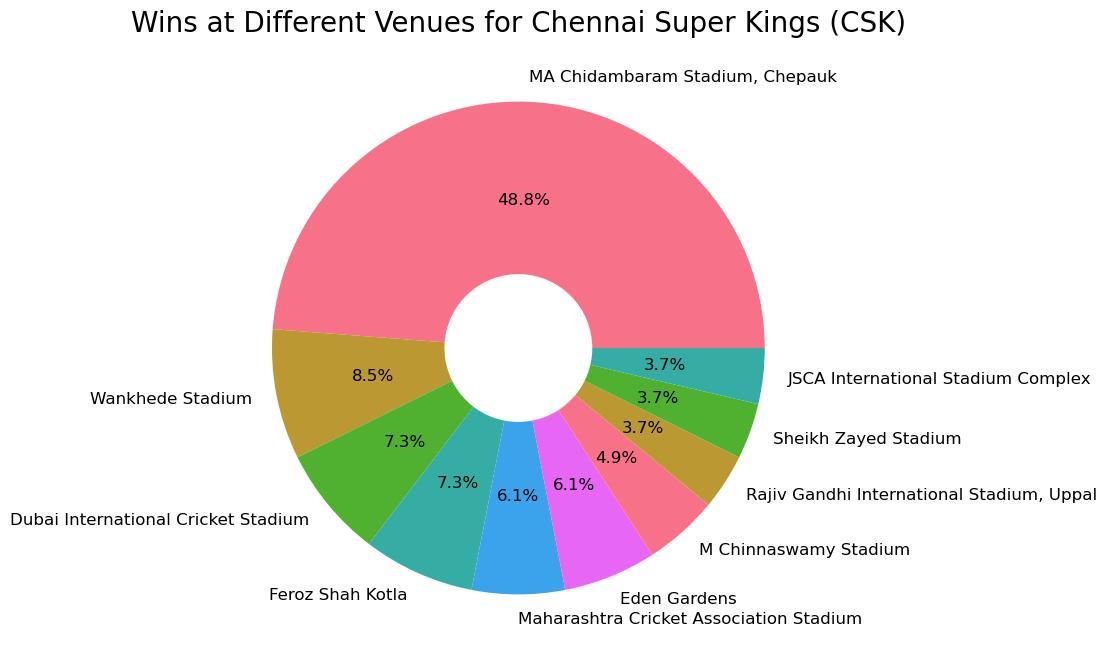

In [37]:

csk_wins = lucky(matches_df, 'Chennai Super Kings')
values = csk_wins.values
labels = csk_wins.index
colors = sns.color_palette("husl")

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.7), textprops={'fontsize': 12})
plt.title('Wins at Different Venues for Chennai Super Kings (CSK)', fontsize=20)

plt.show()

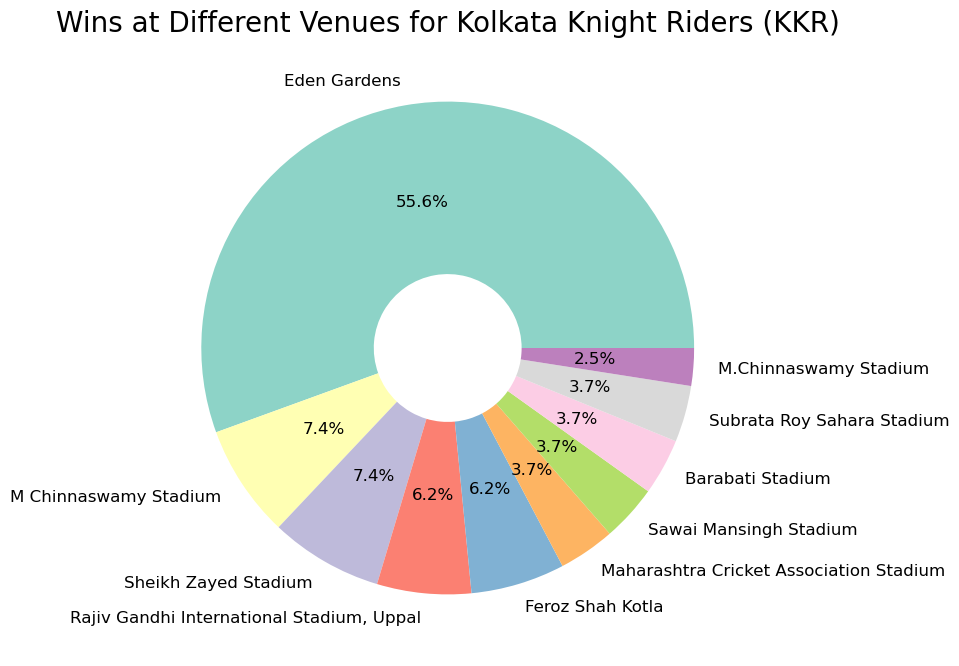

In [38]:
kkr_wins = lucky(matches_df, 'Kolkata Knight Riders')
values = kkr_wins
labels = kkr_wins.index

colors = sns.color_palette("Set3")

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.7), textprops={'fontsize': 12})
plt.title('Wins at Different Venues for Kolkata Knight Riders (KKR)', fontsize=20)

plt.show()

 It can be easily seen that team have won the most of its matches at their home venues.

# 15) Comparision between two teams :

In [39]:
def comparison(team1, team2):
    compare = matches_df[((matches_df['team1'] == team1) | (matches_df['team2'] == team1)) & ((matches_df['team1'] == team2) | (matches_df['team2'] == team2))]

    plt.figure(figsize=(12, 6))
    sns.histplot(data=compare, x='Season', hue='winner', multiple='dodge', palette=colors, bins=15,binwidth=0.5)

    plt.title('Team Comparison')
    plt.xlabel('Season')
    plt.ylabel('Count')

    plt.xticks( ha='center')
    plt.gca().set_xticklabels(sorted(compare['Season'].unique()))

    plt.show()

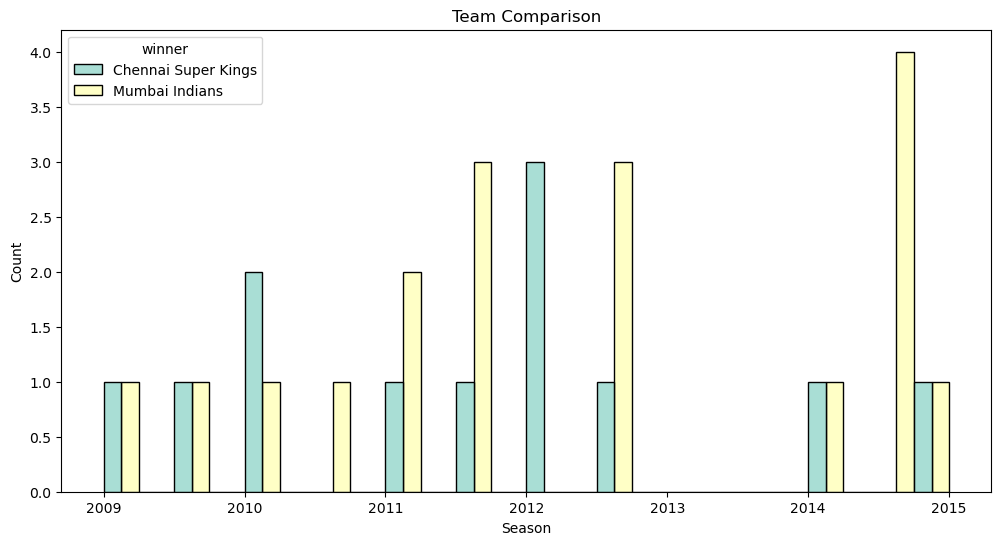

In [40]:
comparison('Mumbai Indians','Chennai Super Kings')

Mumbai Indians is slightly ahead of Chennai Super Kings in this heavy clash. The dominance was especially seen in the 2019 season, where Mumbai defeated Chennai 4 out of 4 times they met, including the playoff and final.

# 16) Particular batsman analysis :

### Lets see some stats of highest run scorer of IPL : Virat Kohli

In [41]:
filt=(deliveries_df['batsman']=='V Kohli')
df_kohli=deliveries_df[filt]
df_kohli.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


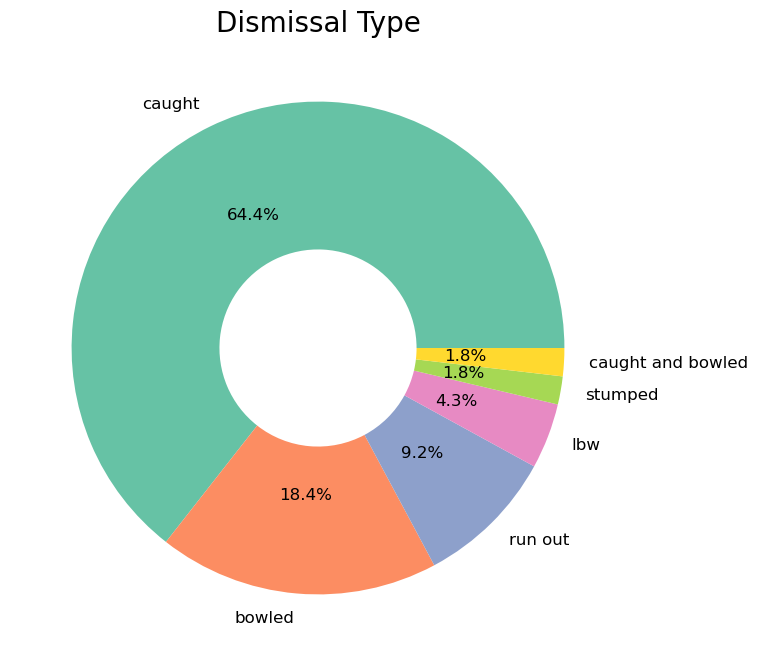

In [42]:
values = df_kohli['dismissal_kind'].value_counts()
labels = df_kohli['dismissal_kind'].value_counts().index
colors = sns.color_palette("Set2")

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.6), textprops={'fontsize': 12})
plt.title('Dismissal Type', fontsize=20)

plt.show()

### Let's Try to visualize Total runs contribution of Virat Kohli

In [43]:
len(df_kohli[df_kohli['batsman_runs']==4])

504

In [44]:
len(df_kohli[df_kohli['batsman_runs']==6])

202

In [45]:
df_kohli['total_runs'].sum()

6081

In [46]:
def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

print("Runs scored from 1's :",count(df_kohli,1))
print("Runs scored from 2's :",count(df_kohli,2))
print("Runs scored from 3's :",count(df_kohli,3))
print("Runs scored from 4's :",count(df_kohli,4))
print("Runs scored from 6's :",count(df_kohli,6))

Runs scored from 1's : 1919
Runs scored from 2's : 692
Runs scored from 3's : 39
Runs scored from 4's : 2016
Runs scored from 6's : 1212


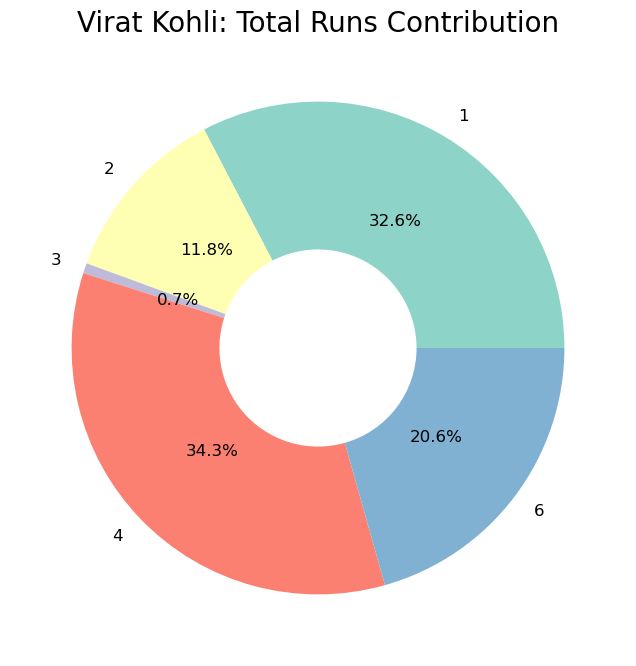

In [47]:

values = [1919, 692, 39, 2016, 1212]
labels = [1, 2, 3, 4, 6]
colors = sns.color_palette("Set3")

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.6), textprops={'fontsize': 12})
plt.title('Virat Kohli: Total Runs Contribution', fontsize=20)

plt.show()

Interesting fact is that Virat Kohli has scored more runs by hitting 4 than by hitting 6

# 18) Scored 200+ runs :

In [48]:
high_scores=deliveries_df.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
score_200=high_scores[high_scores['total_runs']>=200]
score_200.head(5)

,id,inning,batting_team,bowling_team,total_runs
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,222
2,335983,1,Chennai Super Kings,Kings XI Punjab,240
3,335983,2,Kings XI Punjab,Chennai Super Kings,207
14,335989,1,Chennai Super Kings,Mumbai Indians,208
15,335989,2,Mumbai Indians,Chennai Super Kings,202


In [49]:
x1=score_200['batting_team'].value_counts()
x1=pd.DataFrame(x1)
x1.style

,batting_team
Royal Challengers Bangalore,18
Chennai Super Kings,17
Kings XI Punjab,14
Mumbai Indians,14
Kolkata Knight Riders,12
Sunrisers Hyderabad,12
Rajasthan Royals,9
Delhi Daredevils,5
Delhi Capitals,2
Deccan Chargers,1


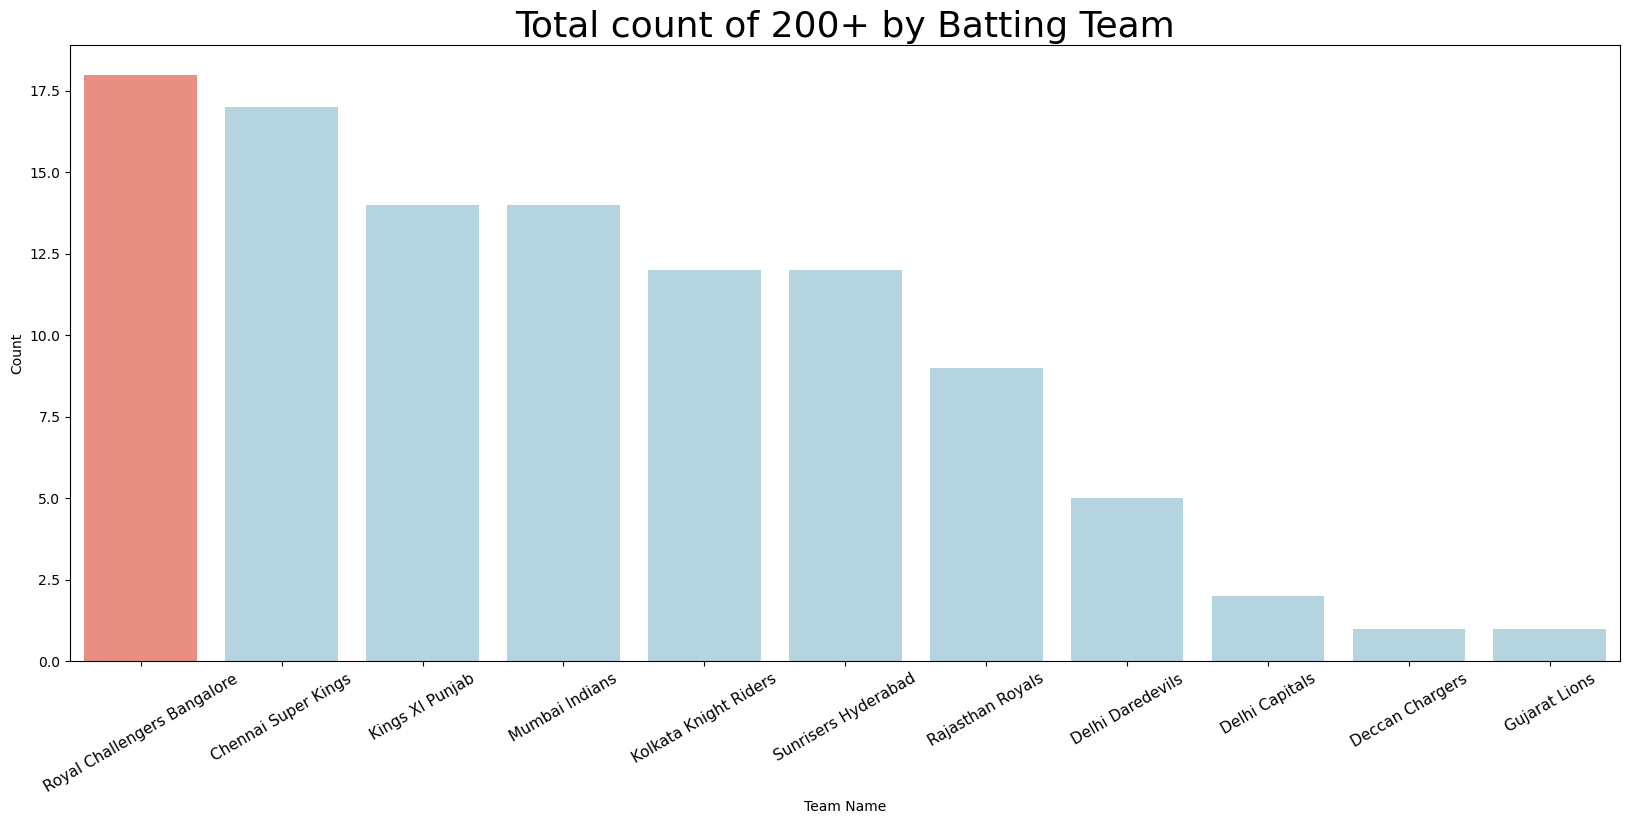

In [50]:
colors = ['lightblue'] * 11
colors[0] = 'salmon'

plt.figure(figsize=(20, 8))
sns.barplot(x=x1.index, y=x1['batting_team'], palette=colors)

plt.title('Total count of 200+ by Batting Team', fontsize=26)
plt.xlabel('Team Name')
plt.ylabel('Count')
plt.xticks(size=11, rotation=30)

plt.show()

Royal Challengers Bangalore had scored the most 200+ score (18 times), followed by Chennai Super Kings who had scored 17 times.

# 19) Conceded 200+ runs :

In [51]:
z=score_200['bowling_team'].value_counts()
z=pd.DataFrame(z)
z.style

,bowling_team
Kings XI Punjab,20
Royal Challengers Bangalore,17
Chennai Super Kings,12
Delhi Daredevils,11
Rajasthan Royals,10
Kolkata Knight Riders,10
Mumbai Indians,8
Sunrisers Hyderabad,7
Gujarat Lions,3
Delhi Capitals,3


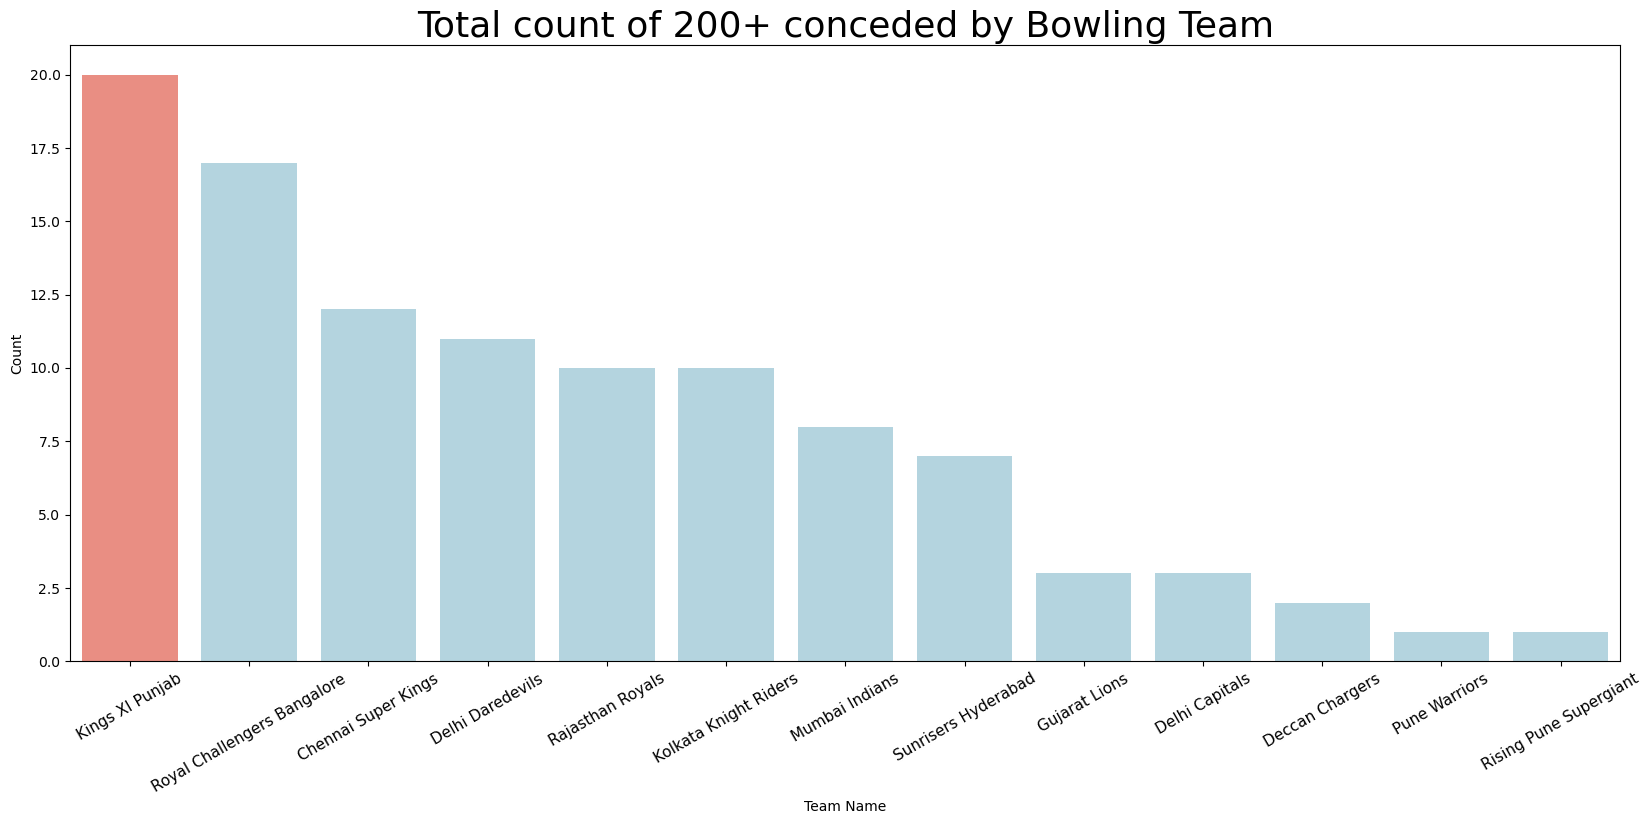

In [52]:
colors = ['lightblue'] * 13
colors[0] = 'salmon'

plt.figure(figsize=(20, 8))
sns.barplot(x=z.index, y=z['bowling_team'], palette=colors)

plt.title('Total count of 200+ conceded by Bowling Team', fontsize=26)
plt.xlabel('Team Name')
plt.ylabel('Count')
plt.xticks(size=11,rotation=30)

plt.show()

Kings XI Punjab has conceded 200+ runs 20 times, followed by Royal Challengers Bangalore (17)

# 20) Highest runs in an innings :

In [53]:
high_200=deliveries_df.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_200.set_index(['id'],inplace=True)

In [54]:
high_200['total_runs'].max()

263

 In season 2013, Royal Challengers Bangalore scored 263/5 against Pune Warriors India.

# 21) Biggest win in terms of run margin :

In [55]:
matches_df[matches_df['result_margin']==matches_df['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017,No


 In season 2017, Mumbai Indians had defeated Delhi Daredevils by a huge margin of 146 runs.

# 22) Most balls played by a batsman:

In [56]:
balls_played=deliveries_df.groupby(['batsman'])['ball'].count().reset_index()
balls_played.sort_values(by='ball',ascending=False).head(10)

,batsman,ball
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
398,RV Uthappa,3658
154,G Gambhir,3524
301,MS Dhoni,3493
96,CH Gayle,3342
42,AM Rahane,3325


Virat kohli had played the most balls.
David Warner and Chris Gayle are the only two foreign players in this top 10 list.

# 23) Top 10 run scorer of all time :

In [57]:
runs=deliveries_df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y.style

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


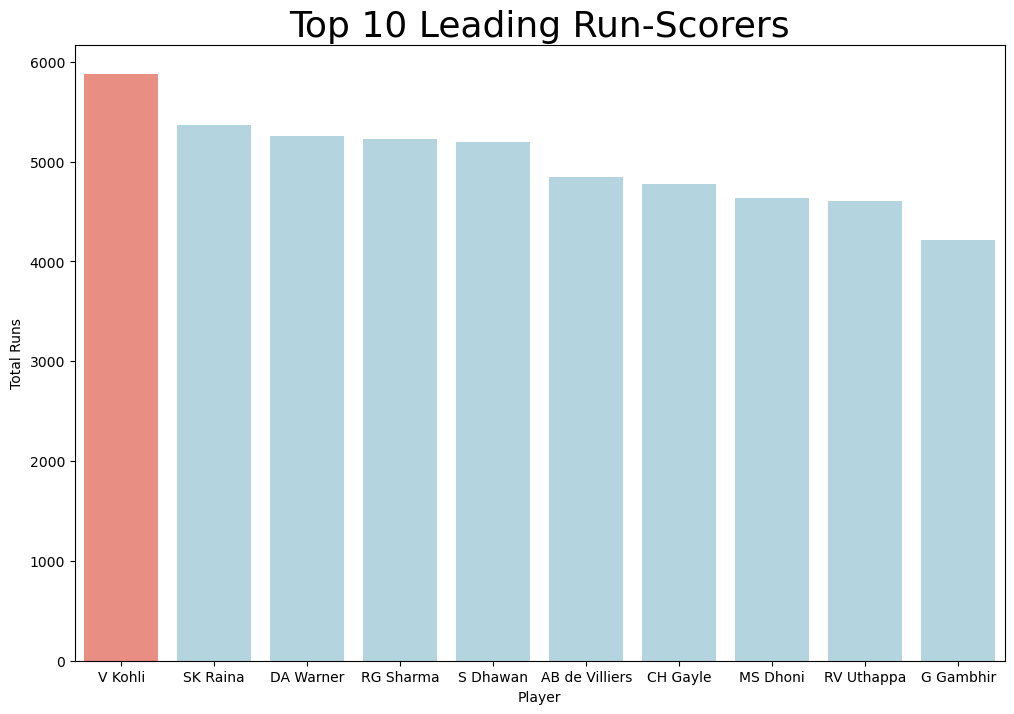

In [58]:
colors = ['lightblue'] * 13
colors[0] = 'salmon'

plt.figure(figsize=(12, 8))
sns.barplot(x=y['Batsman'], y=y['runs'], palette=colors)

plt.title('Top 10 Leading Run-Scorers', fontsize=26)
plt.xlabel('Player')
plt.ylabel('Total Runs')

plt.show()

Virat Kohli is the leading run scorer in IPL.
One interesting thing to notice that MS Dhoni is the only player in this list who bats down the order.

# 24) Most number of 4's :

In [59]:
balls_played=balls_played.merge(runs,left_on='batsman',right_on='Batsman',how='outer')
four=deliveries_df[deliveries_df['batsman_runs']==4]
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['Batsman','4s']
runs_4.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1)

,Batsman,4s
0,S Dhawan,591
1,DA Warner,510
2,V Kohli,504
3,SK Raina,493
4,G Gambhir,492
5,RG Sharma,458
6,RV Uthappa,454
7,AM Rahane,416
8,AB de Villiers,390
9,CH Gayle,384


Shikhar Dhawan holds the record for most number of 4's

# 25) Most number of 6's :

In [60]:
six=deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['Batsman','6s']
six.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1)

,Batsman,6s
0,CH Gayle,349
1,AB de Villiers,235
2,MS Dhoni,216
3,RG Sharma,214
4,V Kohli,202
5,KA Pollard,198
6,DA Warner,195
7,SK Raina,194
8,SR Watson,190
9,RV Uthappa,163


 "The Universe Boss" Chris Gayle had smashed 349 sixes, most by any batsman.

# 26) Highest Strike rate (minimum 100 balls):

In [61]:
player=pd.concat([runs,balls_played.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player['strike_rate']=player['runs']/player['ball']*100
player['4s'].fillna(0,inplace=True)
player.isnull().values.any()

False

In [62]:
player.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,runs,ball,4s,6s,strike_rate
72,B Stanlake,5,2,3.0,0,250.000000
504,Umar Gul,39,19,0.0,5,205.263158
395,RS Sodhi,4,2,1.0,0,200.000000
470,Shahid Afridi,81,46,0.0,6,176.086957
175,I Malhotra,7,4,13.0,0,175.000000
498,TU Deshpande,21,12,0.0,1,175.000000
33,AD Russell,1517,882,24.0,129,171.995465
253,LJ Wright,106,63,4.0,3,168.253968
57,Abdul Samad,111,66,28.0,6,168.181818
235,KMDN Kulasekara,5,3,156.0,0,166.666667


In [63]:
sr=player[player.ball > 100]
sr.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,runs,ball,4s,6s,strike_rate
33,AD Russell,1517,882,24.0,129,171.995465
217,K Gowtham,186,113,247.0,12,164.601770
80,BCJ Cutting,238,146,40.0,19,163.013699
317,N Pooran,521,323,6.0,39,161.300310
453,SP Narine,892,573,0.0,52,155.671902
293,MM Ali,309,199,23.0,23,155.276382
97,CH Morris,551,360,116.0,30,153.055556
192,JC Archer,195,128,18.0,14,152.343750
106,CR Brathwaite,181,120,11.0,16,150.833333
88,Bipul Sharma,187,124,5.0,9,150.806452


In [64]:
reqsr=sr.drop(columns=['runs','ball','4s','6s'],axis=1)
reqsr.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,strike_rate
33,AD Russell,171.995465
217,K Gowtham,164.601770
80,BCJ Cutting,163.013699
317,N Pooran,161.300310
453,SP Narine,155.671902
293,MM Ali,155.276382
97,CH Morris,153.055556
192,JC Archer,152.343750
106,CR Brathwaite,150.833333
88,Bipul Sharma,150.806452


Andre Russel has the highest strike rate, followed by K. Gowtham and B. Cutting.

# 27) Highest wicket-taker :

In [65]:
deliveries_df['dismissal_kind'].unique()
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']
hwt=deliveries_df[deliveries_df["dismissal_kind"].isin(dismissal_kinds)]
bo=hwt['bowler'].value_counts()

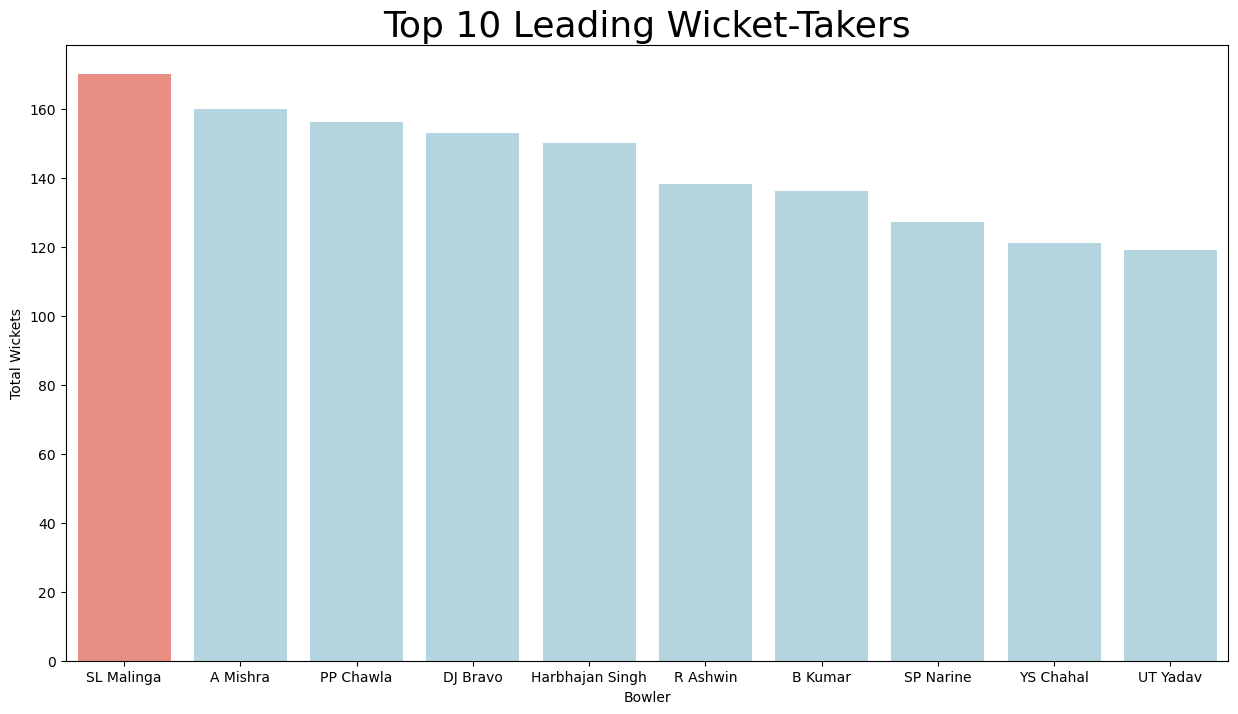

In [66]:
colors = ['lightblue'] * 13
colors[0] = 'salmon'

plt.figure(figsize=(15, 8))
sns.barplot(x=bo[:10].index, y=bo[:10], palette=colors)

plt.title('Top 10 Leading Wicket-Takers', fontsize=26)
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')

plt.show()


L. Malinga is the leading wicket taker in IPL.
6 out of top 10 are spin bowlers.

# 28) Total count of matches played in differnt stadiums :

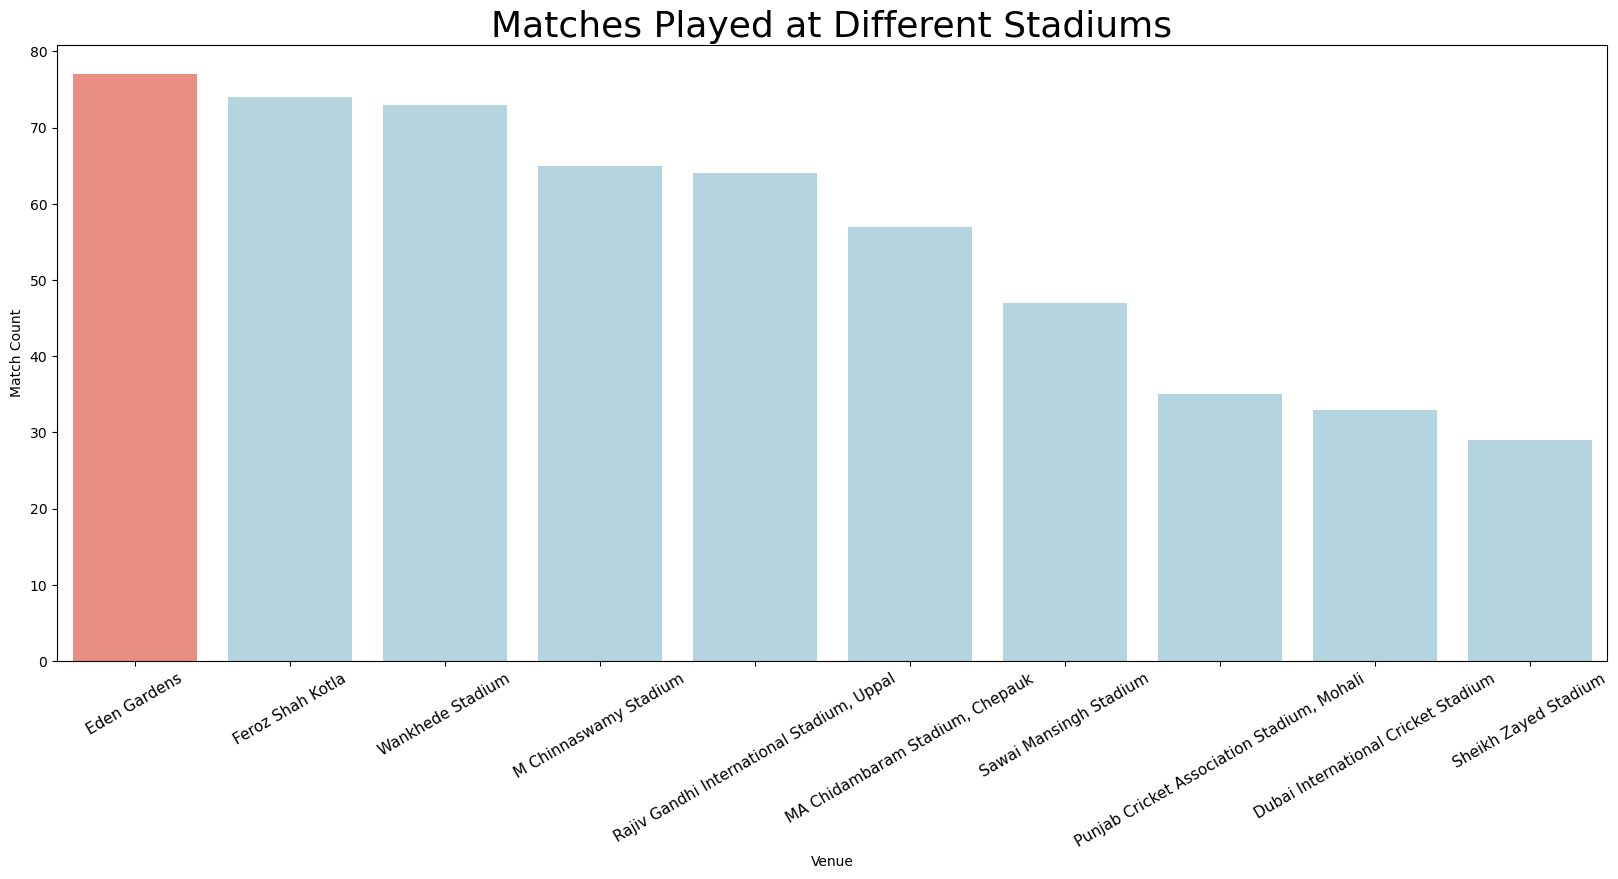

In [67]:
colors = ['lightblue']*13
colors[0] = 'salmon'

plt.figure(figsize=(20, 8))
sns.barplot(x=matches_df['venue'].value_counts()[:10].index, y=matches_df['venue'].value_counts()[:10], palette=colors)

plt.title('Matches Played at Different Stadiums', fontsize=26)
plt.xlabel('Venue')
plt.ylabel('Match Count')
plt.xticks(size=11,rotation=30)

plt.show()

Eden Gardens has hosted most number of matches.

# 29) Man of the Match award :

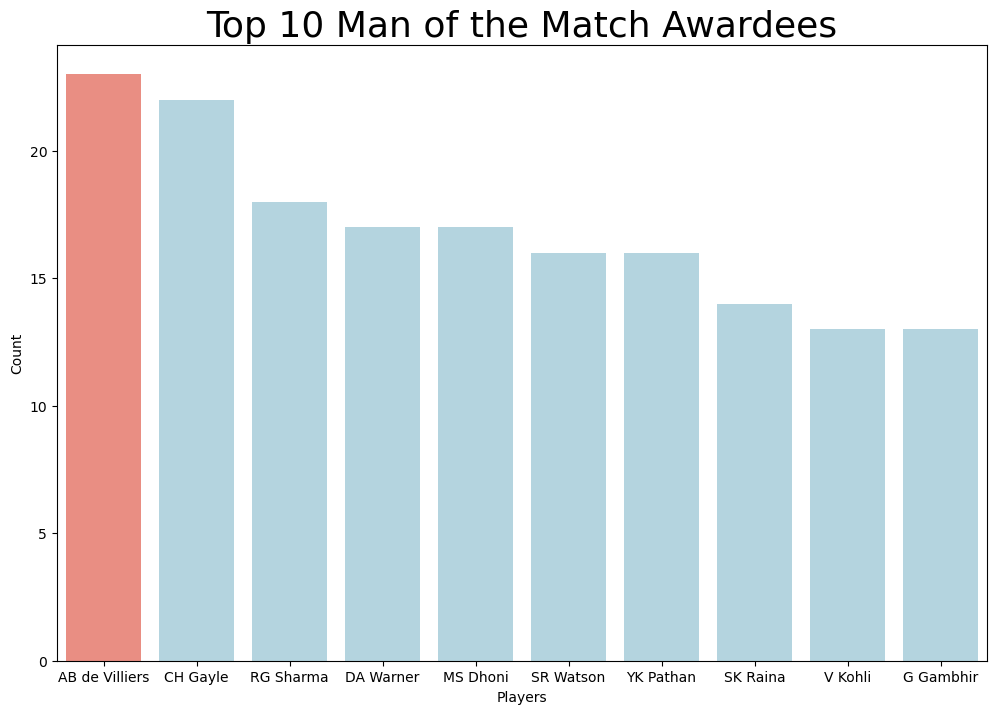

In [68]:
colors = ['lightblue'] * 11
colors[0] = 'salmon'

plt.figure(figsize=(12, 8))
sns.barplot(x=matches_df.player_of_match.value_counts()[:10].index, y=matches_df.player_of_match.value_counts()[:10], palette=colors)

plt.title('Top 10 Man of the Match Awardees', fontsize=26)
plt.xlabel('Players')
plt.ylabel('Count')

plt.show()

 AB de Villiers (23) had won the most MOM awards, followed by Chris Gayle (22)

# 30) Total number of fours in each season :

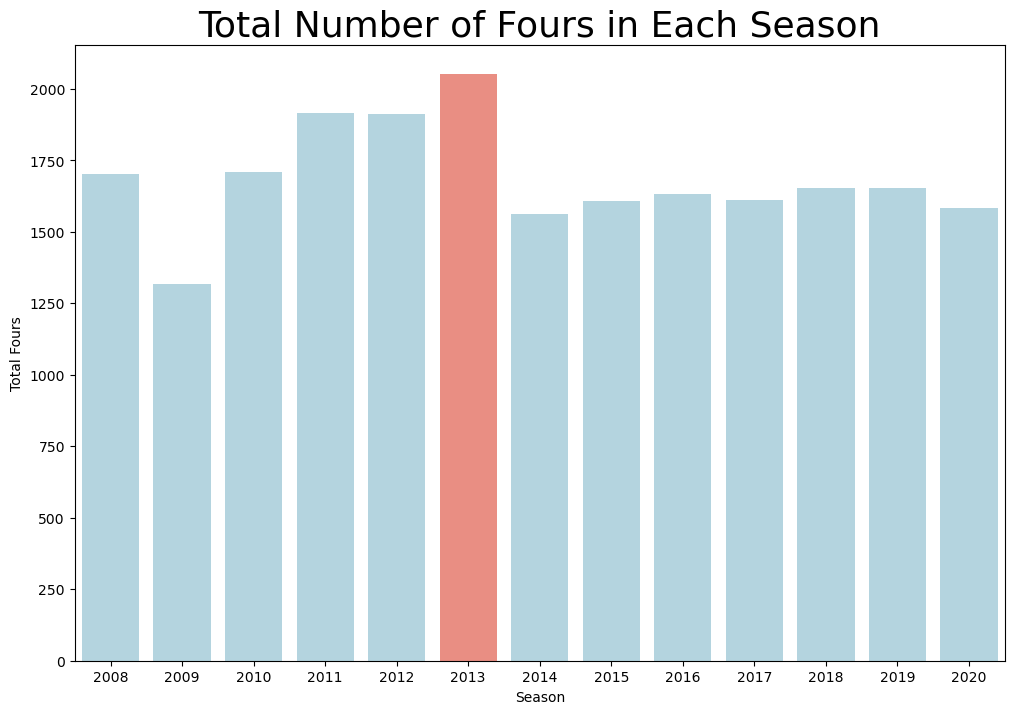

In [69]:
data_4 = matches_df['Season'].unique()

fours_list = []
for var in data_4:
    new_df = matches_df[matches_df['Season'] == var]
    total_fours = 0
    for i in new_df['id'].values:
        temp_df = deliveries_df[deliveries_df['id'] == i]
        fours = temp_df[temp_df['batsman_runs'] == 4]['batsman_runs'].count()
        total_fours += fours
    fours_list.append(total_fours)

colors = ['lightblue'] * 14
colors[5] = 'salmon'

plt.figure(figsize=(12, 8))
sns.barplot(x=data_4, y=fours_list, palette=colors)

plt.title('Total Number of Fours in Each Season', fontsize=26)
plt.xlabel('Season')
plt.ylabel('Total Fours')

plt.show()

Highest number of four in a season was is 2013 season while season 2009 had the lowest count of 4's.

# 31) Total number of sixes in each season :

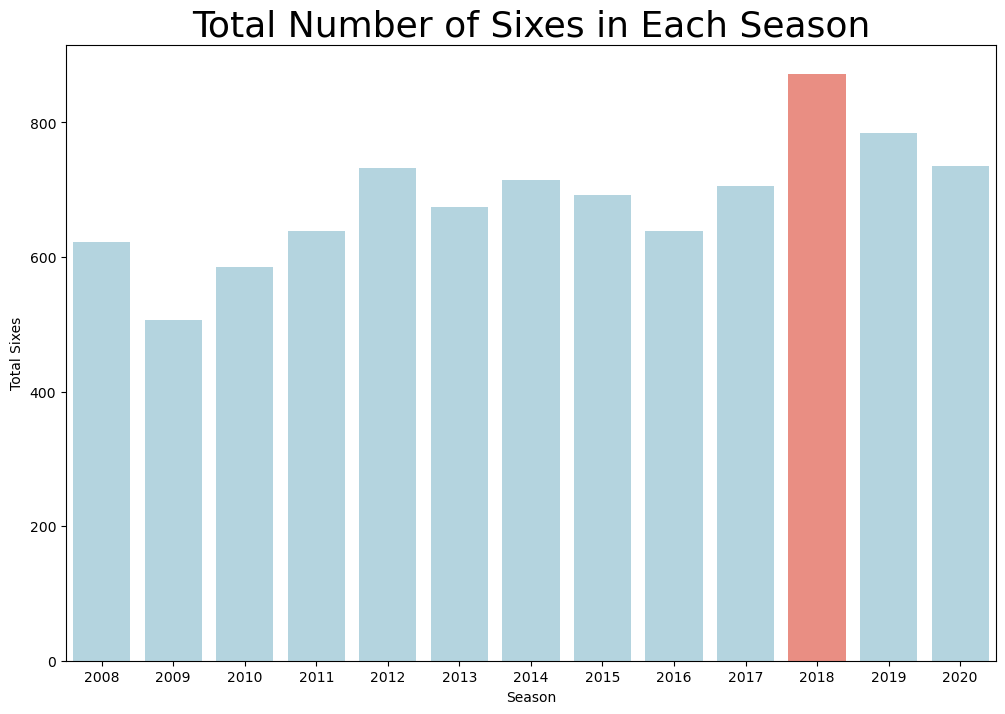

In [70]:

data_6 = matches_df['Season'].unique()

# Getting total sixes from each season by checking id from the matches dataset in the deliveries dataset.
sixes_list = []
for var in data_6:
    new_df = matches_df[matches_df['Season'] == var]
    total_sixes = 0
    for i in new_df['id'].values:
        temp_df = deliveries_df[deliveries_df['id'] == i]
        sixes = temp_df[temp_df['batsman_runs'] == 6]['batsman_runs'].count()
        total_sixes += sixes
    sixes_list.append(total_sixes)

colors = ['lightblue'] * 14
colors[-4] = 'salmon'

plt.figure(figsize=(12, 8))
sns.barplot(x=data_6, y=sixes_list, palette=colors)

plt.title('Total Number of Sixes in Each Season', fontsize=26)
plt.xlabel('Season')
plt.ylabel('Total Sixes')

plt.show()

 In season 2018, the maximum number of sixes were hit while the lowest was observed in season 2009.

# 32) Total runs scored from boundaries in each season :¶

In [71]:
runs4=np.dot(fours_list,4)
runs6=np.dot(sixes_list,6)

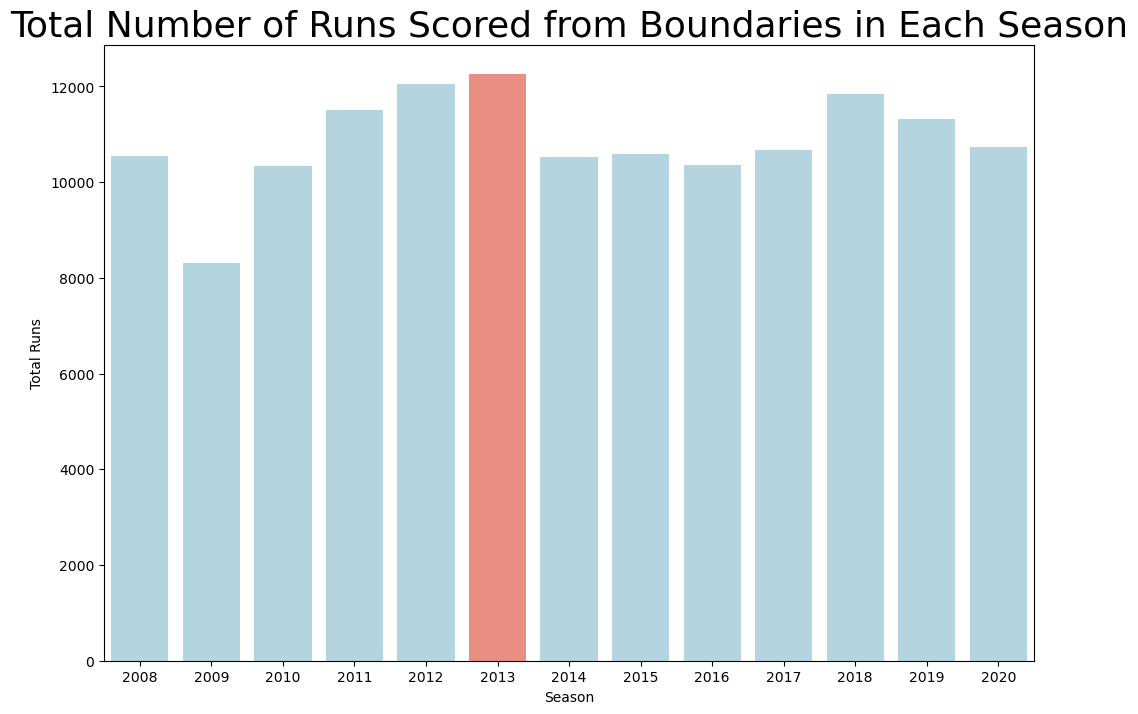

In [72]:

k = runs4 + runs6
Y = matches_df['Season'].unique()

colors = ['lightblue'] * 14
colors[5] = 'salmon'

plt.figure(figsize=(12, 8))
sns.barplot(x=Y, y=k, palette=colors)

plt.title('Total Number of Runs Scored from Boundaries in Each Season', fontsize=26)
plt.xlabel('Season')
plt.ylabel('Total Runs')

plt.show()


 Total run scored from boundaries is lowest in season 2009 and highest in season 2013.

# 33) Total contribution of runs from boundaries in each season :

In [73]:
season = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p = season.set_index('Season')

In [74]:
totruns=np.array(season['total_runs'])
res=(k/totruns)*100
res

array([58.81697051, 50.88235294, 54.82400339, 54.35378652, 53.63203135,
       54.3809059 , 55.6983447 , 57.71328824, 54.95705652, 56.87037136,
       59.49449776, 58.32989691, 55.50847458])

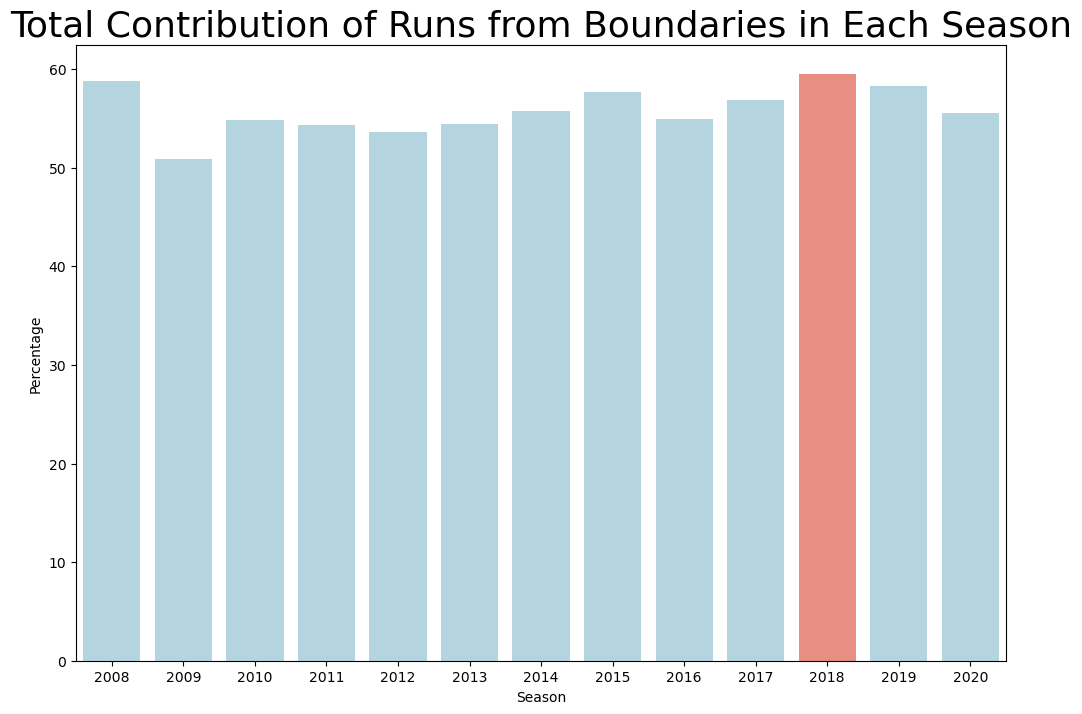

In [75]:
colors = ['lightblue'] * 14
colors[10] = 'salmon'

plt.figure(figsize=(12, 8))
sns.barplot(x=Y, y=res, palette=colors)

plt.title('Total Contribution of Runs from Boundaries in Each Season', fontsize=26)
plt.xlabel('Season')
plt.ylabel('Percentage')

plt.show()

In season 2018, aroun 59 % runs of the total runs came from boundaries while 50% runs came from boundaries in season 2009 which is lowest till now.

# 34) Total runs scored by teams in first 6 overs :

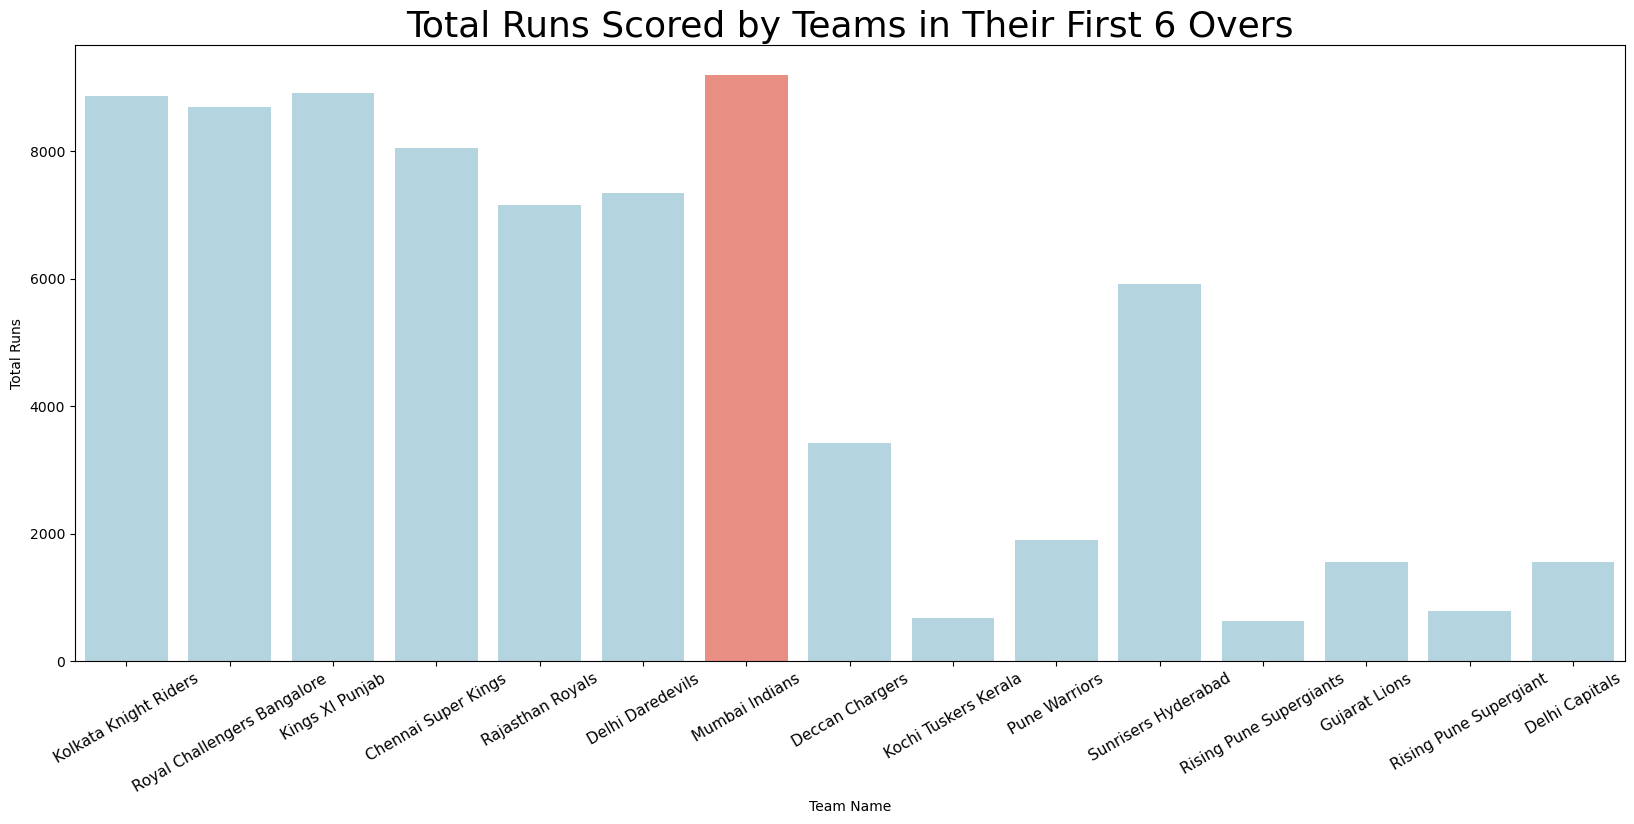

In [76]:
team = deliveries_df['batting_team'].unique()
team_runs = []

for var in team:
    temp_df = deliveries_df[deliveries_df['batting_team'] == var]
    temp_df = temp_df[temp_df['over'].isin([0, 1, 2, 3, 4, 5])]
    runs = temp_df['total_runs'].sum()
    team_runs.append(runs)

team = pd.DataFrame(data=team_runs, index=team, columns=['Runs In First 6 Overs'])
# team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team.index.name = 'Team'

colors = ['lightblue'] * 15
colors[6] = 'salmon'

plt.figure(figsize=(20, 8))
sns.barplot(x=team.index, y=team['Runs In First 6 Overs'], palette=colors)

plt.title('Total Runs Scored by Teams in Their First 6 Overs', fontsize=26)
plt.xlabel('Team Name')
plt.ylabel('Total Runs')
plt.xticks(size=11,rotation=30)

plt.show()


 Mumbai Indians had scored the most runs in first 6 overs, followed by Kings XI Punjab.

# 35) Total runs scored by teams in last 4 overs :

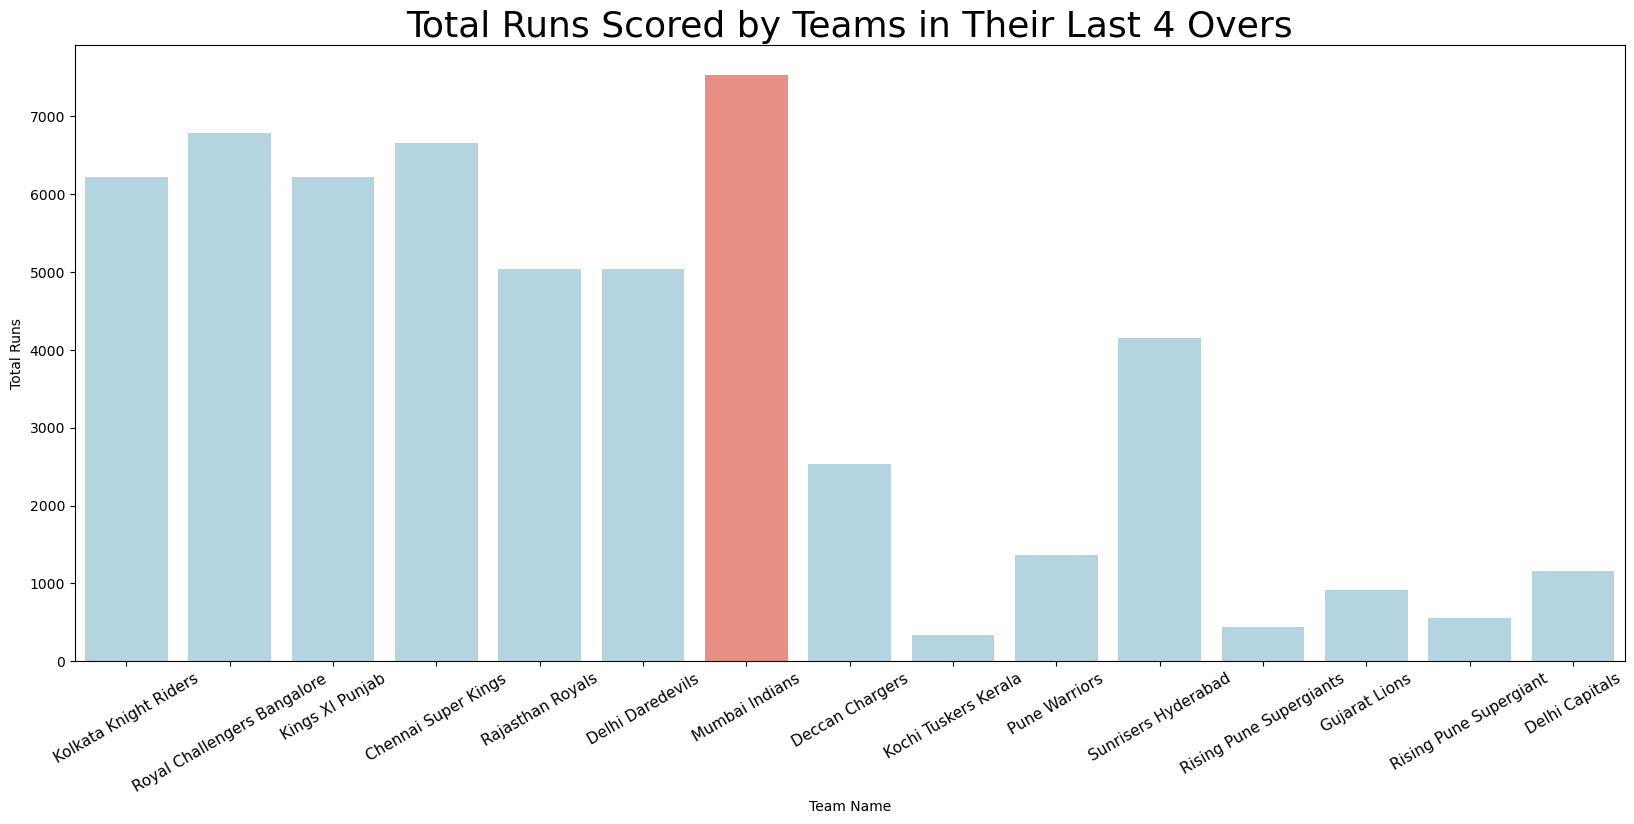

In [77]:

team1 = deliveries_df['batting_team'].unique()
team_runs1 = []

for var in team1:
    temp_df = deliveries_df[deliveries_df['batting_team'] == var]
    temp_df = temp_df[temp_df['over'].isin([19, 18, 17, 16])]
    runs1 = temp_df['total_runs'].sum()
    team_runs1.append(runs1)

team1 = pd.DataFrame(data=team_runs1, index=team1, columns=['Runs In Last 4 Overs'])
team1.index.name = 'Team'

colors = ['lightblue'] * 15
colors[6] = 'salmon'

plt.figure(figsize=(20, 8))
sns.barplot(x=team1.index, y=team1['Runs In Last 4 Overs'], palette=colors)

plt.title('Total Runs Scored by Teams in Their Last 4 Overs', fontsize=26)
plt.xlabel('Team Name')
plt.ylabel('Total Runs')
plt.xticks(size=11,rotation=30)

plt.show()

 Mumbai Indians had scored most runs in last 4 overs, followed by Royal Challengers Bangalore.

 Gujarat Lions has the highest scoring run-rate in first 6 overs, followed by Rising Pune Supergiant.